# <FONT COLOR = "red">***EXERCISE - LESSON 1***</FONT>
---
---

I fulfill the requirements proposed on the Lesson 1 on this notebook.

## <FONT COLOR = "orange">**Exercise 1. Data Cleaning and Preprocessing**</FONT>
---
---

1.   Load the "iris" dataset
using the scikit-learn library. ✅
2.   Perform an initial analysis of the data to identify whether there are null or missing values. ✅
3.   Handle missing values by using the mean to fill in missing data in numerical features. ✅
4.   Use the mode to fill in the missing data in the categorical characteristics. ✅
5.   Elimina las filas que contengan valores nulos restantes en los datos. ✅

In [ ]:
# IMPORT COMMON LIBRARIES
import pandas as pd
import numpy as np

# IMPORT LIBRARIES TO CREATE PICTURES
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT LIBRARIES TO OBATAIN DATASETS
from sklearn.datasets import load_iris

In [ ]:
# LOAD IRIS DATASET
iris = load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# CHECK THE MISSING VALUES
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


As seen in the previous cell, the dataset does not have missing information.

However, to complete the exercise below, the solution for point 3 is presented.

In [ ]:
# CALCULATE MEAN VALUE OF THE FEATURE
mean_value = df_iris['target'].mean()
# FILL THE MISSING VALUES
df_iris.fillna({'target': mean_value}, inplace=True)

# CHECK THE MISSING VALUES
print(f'Target: {df_iris.target.isnull().sum()}')

Target: 0


On this dataset not exist any categorical feature since all features are continuous. However to fulfill the requirement on the point 4 presented, I consider all features as categorical.

In [ ]:
for feature in iris['feature_names']:
  # CALCULATE THE MODE
  mode_value = df_iris[feature].mode()[0]
  # FILL MISSING VALUES
  df_iris.fillna({feature: mode_value}, inplace=True)

# CHECK THE MISSING VALUES
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Again, on the iris dataset not exist some missing value to delete, but to fulfill the requirement on the next code cell you can find how do this task.

In [ ]:
# DROP ROWS WITH ANY NULL VALUE.
df_iris.dropna(inplace=True)

# CHECK THE MISSING VALUES
print(df_iris.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## <FONT COLOR = "orange">**Exercise 2. Data Transformation**</FONT>
---
---

1.   Use scikit-learn's OneHotEncoder method to convert categorical features into dummy variables. ✅
2.   Uses scikit-learn's MinMaxScaler to scale numerical features in a range of 0 to 1. ✅
3.   Apply a logarithmic transformation to one of the numerical characteristics and observe how its distribution changes. ✅
4.   Create a transformation pipeline that includes one-hot encoding and feature scaling. ✅

In [ ]:
# IMPORT TRANSFORMATION LIBRARIES
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# TARGET IS A CATEGORICAL FEATURE AND THE SAME TIME IS THE LABEL TO PREDICT
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_iris[['target']])

# CREATE THE ENCODED COLUMNS
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['target']))

# CONCATENATE THE ENCODED FEATURES WITH THE ORIGINAL DATAFRAME
df_iris_encoded = pd.concat([df_iris, encoded_df], axis=1)

# DROP THE ORIGINAL TARGET COLUMN
df_iris_encoded = df_iris_encoded.drop('target', axis=1)

# RENAME TARGET_0.0, TARGET_1.0, AND TARGET 2.0 AS SETOSA, VERSICOLOR, AND VIRGINICA
df_iris_encoded.rename(columns={'target_0.0': 'setosa', 'target_1.0':'versicolour', 'target_2.0':'virginica'}, inplace=True)

# DISPLAY THE ENCODED DATAFRAME
display(df_iris_encoded)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [ ]:
# CREATE A MINMAXSCALER OBJECT
scaler_minmax = MinMaxScaler()

# APPLY THE TRANSFORMATIONS TO NUMERICAL FEATURES
df_iris_encoded[df_iris_encoded.columns[:-3]] = scaler_minmax.fit_transform(df_iris_encoded[df_iris_encoded.columns[:-3]])

# SHOW THE RESULTS
display(df_iris_encoded)
display(df_iris_encoded.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0
146,0.555556,0.208333,0.677966,0.750000,0.0,0.0,1.0
147,0.611111,0.416667,0.711864,0.791667,0.0,0.0,1.0
148,0.527778,0.583333,0.745763,0.916667,0.0,0.0,1.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.333333,0.333333,0.333333
std,0.230018,0.181611,0.299203,0.317599,0.472984,0.472984,0.472984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000,0.000000,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.000000,0.000000,0.000000
75%,0.583333,0.541667,0.694915,0.708333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica,sepal_length_log
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0,0.200671
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0,0.154151
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0,0.105361
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0,0.080043
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0,0.177681
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0,0.510826
146,0.555556,0.208333,0.677966,0.750000,0.0,0.0,1.0,0.441833
147,0.611111,0.416667,0.711864,0.791667,0.0,0.0,1.0,0.476924
148,0.527778,0.583333,0.745763,0.916667,0.0,0.0,1.0,0.423814


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica,sepal_length_log
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.333333,0.333333,0.333333,0.343945
std,0.230018,0.181611,0.299203,0.317599,0.472984,0.472984,0.472984,0.160774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000,0.000000,0.000000,0.200671
50%,0.416667,0.416667,0.567797,0.500000,0.000000,0.000000,0.000000,0.348307
75%,0.583333,0.541667,0.694915,0.708333,1.000000,1.000000,1.000000,0.459532
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147


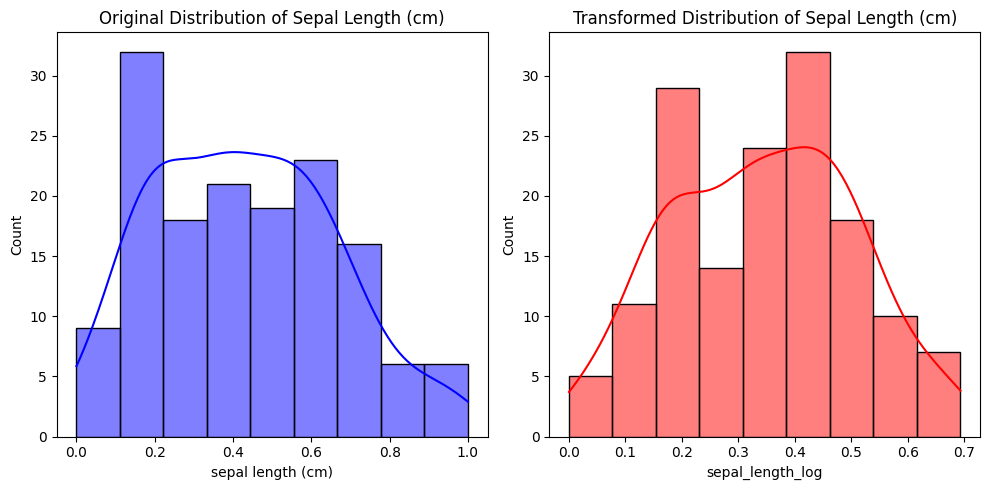

In [ ]:
# APPLY LOGARITHMIC TRANSFORMATIONTO SEPAL LENGTH
df_copy = df_iris_encoded.copy()
df_copy['sepal_length_log'] = np.log(df_copy['sepal length (cm)'] + 1) # +1 to avoid log(0)

# SHOW RESULTS
display(df_copy)
display(df_copy.describe())

# SHOW PICTURE OF DISTRIBUTION
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df_copy['sepal length (cm)'], ax = axes[0], kde=True, color='blue')
axes[0].set_title('Original Distribution of Sepal Length (cm)')
sns.histplot(df_copy['sepal_length_log'], ax = axes[1], kde=True, color='red')
axes[1].set_title('Transformed Distribution of Sepal Length (cm)')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
## PIPELINE CREATION

# DEFINE CATEGORICAL AND NUMERICAL FEATURES
num_features = df_iris.columns[:-1]
cat_features = [df_iris.columns[-1]]

# CREATE TRANSFORMERS
num_transformer = Pipeline( steps = [
  ('scaler', MinMaxScaler())
])
cat_transformer = Pipeline( steps = [
  ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# CREATE COLUMN TRANSFORMER
preprocessor = ColumnTransformer( transformers=[
  ('num', num_transformer, num_features),
  ('cat', cat_transformer, cat_features)
])

# TRANSFORM DATA
transformed_data = preprocessor.fit_transform(df_iris)

# CREATE A NEW DATAFRAME
col_names = list(num_features) + ['setosa', 'versicolour', 'virginica']
df_pipe = pd.DataFrame(data=transformed_data, columns=col_names)

# SHOW RESULTS
display(df_pipe)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolour,virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0
146,0.555556,0.208333,0.677966,0.750000,0.0,0.0,1.0
147,0.611111,0.416667,0.711864,0.791667,0.0,0.0,1.0
148,0.527778,0.583333,0.745763,0.916667,0.0,0.0,1.0


## <FONT COLOR = "orange">**Exercise 3. Initial Data Visualization**</FONT>
---
---

1.   Use histograms to visualize the distribution of a numerical characteristic in the data. ✅
2.   Create a scatter plot to explore the relationship between two numerical characteristics. ✅
3.   Use bar graphs to visualize the frequency of a categorical characteristic. ✅
4.   Combine multiple visualizations into a single figure using matplotlib or seaborn to get a more complete view of your data. ✅

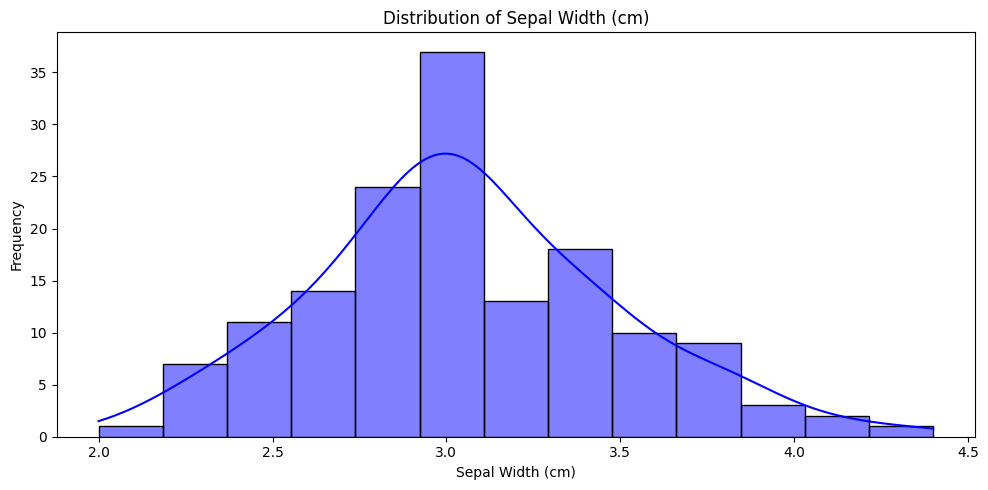

In [ ]:
## HISTOGRAM VISUALIZATION OF SEPAL WIDTH
plt.figure(figsize=(10,5))
sns.histplot(df_iris['sepal width (cm)'], kde=True, color='blue')
plt.title('Distribution of Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

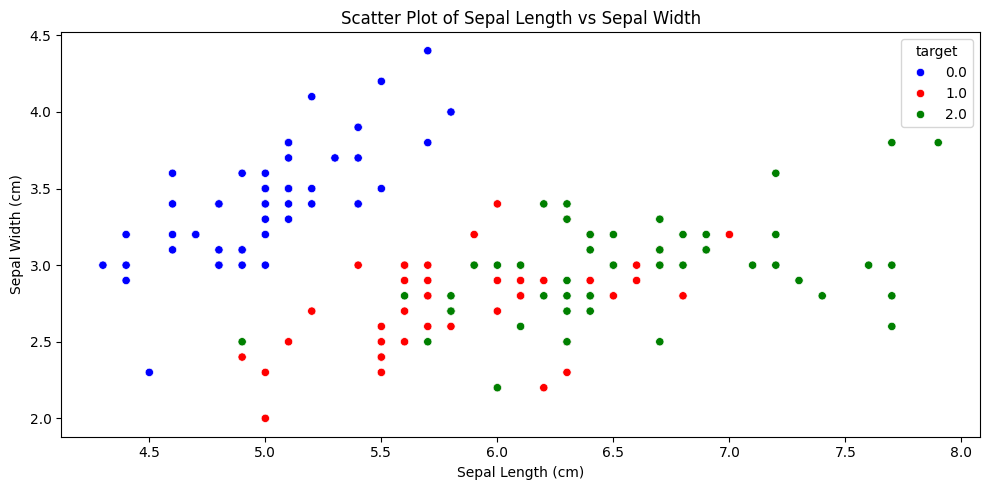

In [ ]:
## SCATTER PLOT BETWEEN SEPAL LENGTH AND SEPAL WIDTH
plt.figure(figsize=(10,5))
colors = ['blue', 'red', 'green']
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

<ipython-input-55-0d1b227dfdd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_iris, x='target', palette=colors)


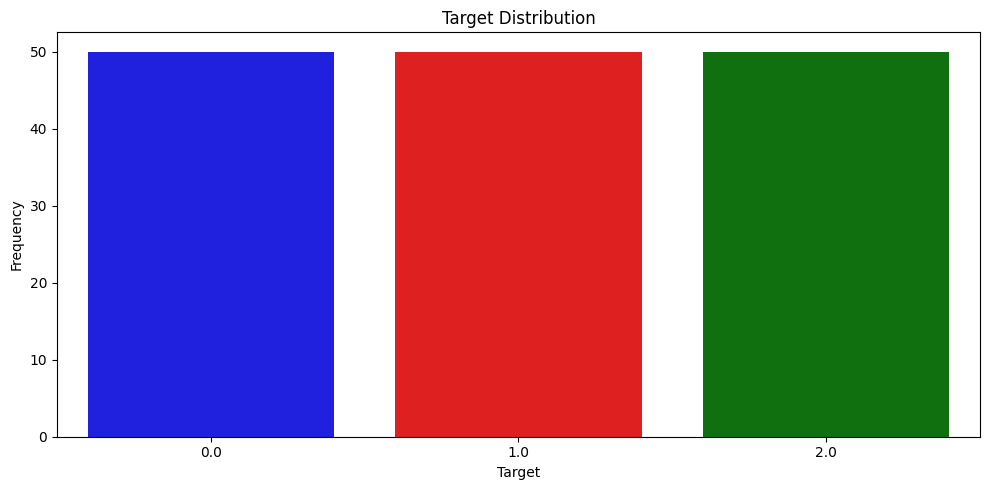

In [ ]:
## BAR GRAPH TO VISUALIZATE THE TARGET (CATEGORICAL FEATURE) DISTRIBUTION
plt.figure(figsize=(10,5))
sns.countplot(data=df_iris, x='target', palette=colors)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

<ipython-input-62-72dfca744a47>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_iris, x='target', palette=colors, ax=axes[2])


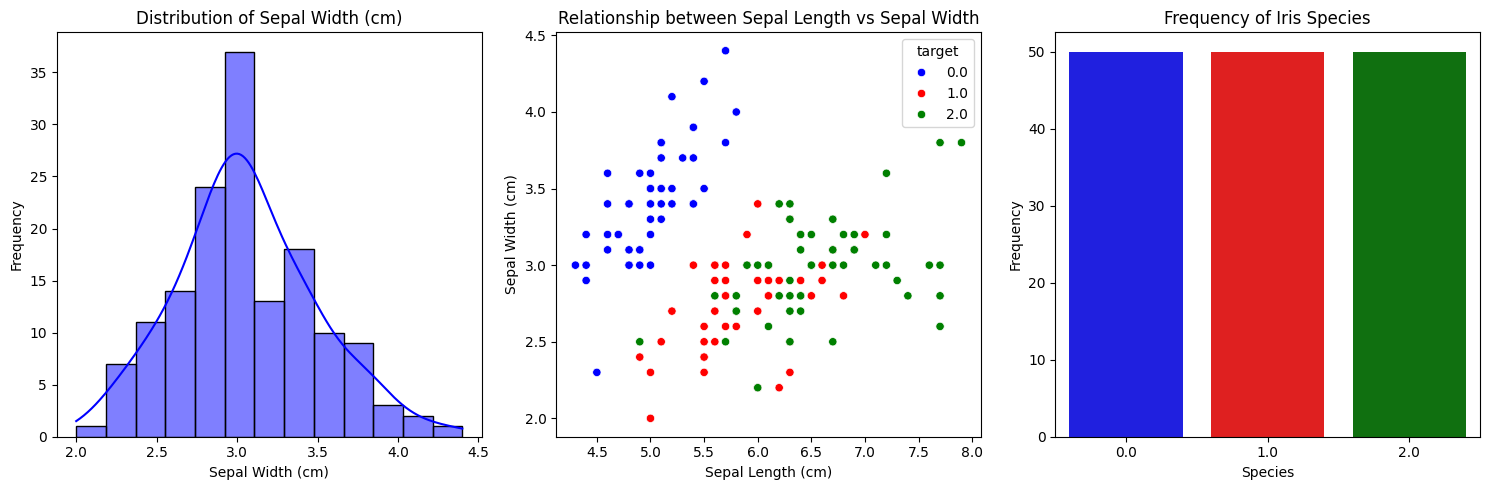

In [ ]:
## COMBINE FIGURES
fig, axes = plt.subplots(1,3,figsize=(15,5))

# HISTOGRAM FOR SEPAL WIDTH
sns.histplot(df_iris['sepal width (cm)'], ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Sepal Width (cm)')
axes[0].set_xlabel('Sepal Width (cm)')
axes[0].set_ylabel('Frequency')

# SCATTER PLOT FOR SEPAL LENGTH AND SEPAL WIDTH
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors, ax=axes[1])
axes[1].set_title('Relationship between Sepal Length vs Sepal Width')
axes[1].set_xlabel('Sepal Length (cm)')
axes[1].set_ylabel('Sepal Width (cm)')

# BAR GRAPH FOR TARGET DISTRIBUTION
sns.countplot(data=df_iris, x='target', palette=colors, ax=axes[2])
axes[2].set_title('Frequency of Iris Species')
axes[2].set_xlabel('Species')
axes[2].set_ylabel('Frequency')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

## <FONT COLOR = "orange">**Exercise 4. Integration of Cleansing, Transformation and Visualization**</FONT>
---
---

1.   Load a dataset that contains both numerical and categorical features. ✅
2.   Performs data cleaning and preprocessing, handling missing values and applying transformations as needed. ✅
3.   Uses learned transformation techniques to prepare data for modeling. ✅
4.   Visualize the preprocessed data using the learned visualization techniques and analyze the distributions and relationships between features. ✅

In [ ]:
# IMPORT DATASET LIBRARY
from sklearn.datasets import fetch_openml

# IMPORT ITERATION LIBRARY
import itertools

# IMPORT REGULAR EXPRESSION LIBRARY
import re

In [ ]:
## LOAD DATASET
data = fetch_openml(name='adult', version=2, as_frame=True)
df_adult = data.frame

# DISPLAY DATAFRAME
display(df_adult)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From as of this point, I will realize a data cleaning process.

In [ ]:
display(df_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


None

In [ ]:
# CHECK MISSING VALUES
print(df_adult.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64


In this case, we can see missing values for three features in the adult dataset. As in this case, the proportion is low in contrast to the total records. I usually delete these records, but in this case, I will fill them with data-cleaning techniques to fulfill the exercise.

It is crucial to remember that the missing values on the three features are all categorical.

In [ ]:
# CATEGORICAL FEATURES WITH MISSING VALUES
miss_cat = ['workclass', 'occupation', 'native-country']

for feature in miss_cat:
  # CALCULATE MODE
  mode_value = df_adult[feature].mode()[0]
  # FILLL MISSING VALUES
  df_adult.fillna({feature:mode_value}, inplace=True)

# CHECK THE MISSING VALUES
print(df_adult.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


I have now finished the cleanup, but just in case, I will indicate that all rows with null data should be deleted.

In [ ]:
# DROPS ROWS WITH ANU NULL VALUE
df_adult.dropna(inplace=True)

# DISPLAY ADULT DATAFRAME INFORMATION
display(df_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       48842 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      48842 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


None

Since the proportion of records has not changed at all, then it is concluded that the cleaning was successful.

Therefore, since the dataset has both numerical and categorical features, then I will proceed to perform the data transformation with a ***Pipeline***.

In [ ]:
# DEFINE CATEGORICAL AND NUMERICAL FEATURES
ad_num_features = [i for i in df_adult.columns if df_adult[i].dtype != 'category']
ad_cat_features = [i for i in df_adult.columns if df_adult[i].dtype == 'category']

# CREATE TRANSFORMERS
ad_num_transformer = Pipeline( steps = [
    ('scaler', MinMaxScaler())
])
ad_cat_transformer = Pipeline( steps = [
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# CREATE COLUMN TRANSFORMER
ad_preprocessor = ColumnTransformer( transformers=[
    ('num', ad_num_transformer, ad_num_features),
    ('cat', ad_cat_transformer, ad_cat_features)
])

# TRANSFORM DATA
ad_transformed_data = ad_preprocessor.fit_transform(df_adult)

# The OneHotEncoder is now fitted. Get feature names here.
ad_col_names = list(ad_num_features) + list(ad_preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(ad_cat_features))

# CREATE A NEW DATAFRAME
df_adult_pipe = pd.DataFrame(data=ad_transformed_data, columns=ad_col_names)

# SHOW RESULTS
pd.set_option('display.max_columns', None)
display(df_adult_pipe)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,class_>50K
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.

In [ ]:
workclass_col = df_adult_pipe.filter(regex='^workclass_', axis=1).columns
education_col = df_adult_pipe.filter(regex='^education_', axis=1).columns
marital_status_col = df_adult_pipe.filter(regex='^marital-status_', axis=1).columns
occupation_col = df_adult_pipe.filter(regex='^occupation_', axis=1).columns
relationship_col = df_adult_pipe.filter(regex='^relationship_', axis=1).columns
race_col = df_adult_pipe.filter(regex='^race_', axis=1).columns
sex_col = df_adult_pipe.filter(regex='^sex_', axis=1).columns
native_country_col = df_adult_pipe.filter(regex='^native-country_', axis=1).columns
class_col = df_adult_pipe.filter(regex='^class_', axis=1).columns

In [ ]:
# FUNCTION TO COUPLE CATEGORICAL COLUMNS
def couple_columns(col_names:pd.core.indexes.base.Index, col_name:str, df:pd.DataFrame) -> pd.DataFrame:
  index = 0
  for col in col_names:
    df[col] = df[col]*index
    index += 1
  df[col_name] = df[col_names].sum(axis=1)
  df.drop(col_names, axis=1, inplace=True)
  return df

In [ ]:
# COUPLE COLUMNS
df_adult_pipe = couple_columns(workclass_col, 'workclass', df_adult_pipe)
df_adult_pipe = couple_columns(education_col, 'education', df_adult_pipe)
df_adult_pipe = couple_columns(marital_status_col, 'marital-status', df_adult_pipe)
df_adult_pipe = couple_columns(occupation_col, 'occupation', df_adult_pipe)
df_adult_pipe = couple_columns(relationship_col, 'relationship', df_adult_pipe)
df_adult_pipe = couple_columns(race_col, 'race', df_adult_pipe)
df_adult_pipe = couple_columns(sex_col, 'sex', df_adult_pipe)
df_adult_pipe = couple_columns(native_country_col, 'native-country', df_adult_pipe)
df_adult_pipe = couple_columns(class_col, 'class', df_adult_pipe)

# SHOW RESULTS
display(df_adult_pipe)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,1.0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,3.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,1.0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,3.0,15.0,4.0,9.0,3.0,4.0,0.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.165763,0.733333,0.000000,0.0,0.377551,3.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,0.0
48838,0.315068,0.096129,0.533333,0.000000,0.0,0.397959,3.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,1.0
48839,0.561644,0.094462,0.533333,0.000000,0.0,0.397959,3.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,0.0
48840,0.068493,0.128004,0.533333,0.000000,0.0,0.193878,3.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,0.0


Now, we can see some grahps to understanding better the dataset.

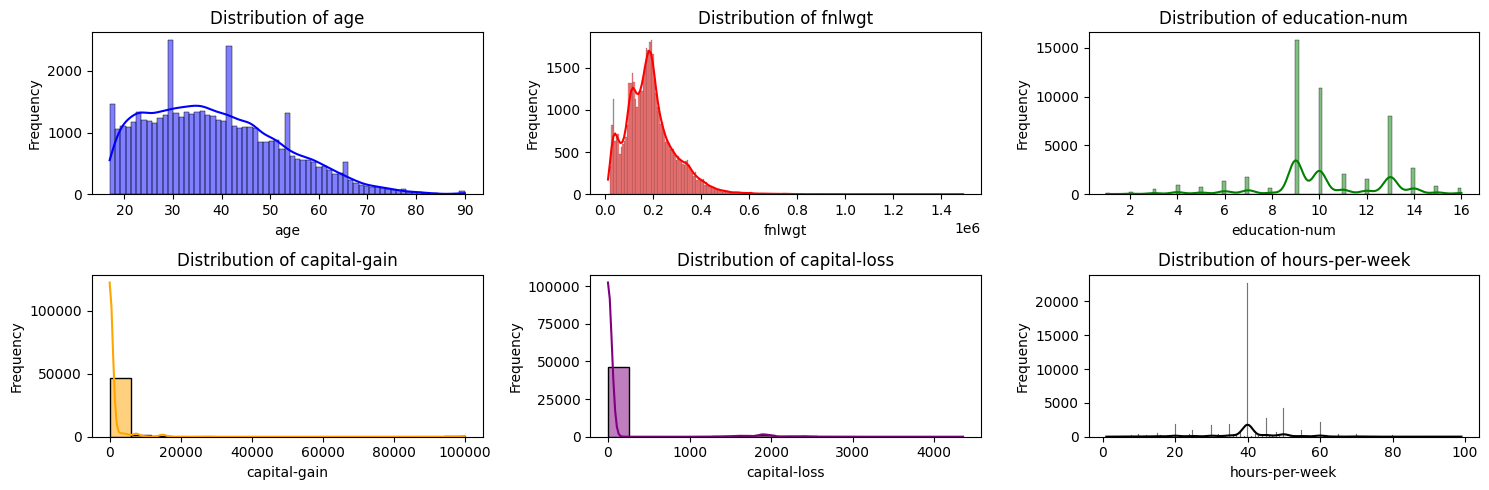

In [ ]:
# VISUALIZE NUMERICAL FEATURE DISTRIBUTION
fig, axes = plt.subplots(2,3,figsize=(15,5))
index_num_features = 0
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black']
for i in range(0,2):
  for j in range(0,3):
    sns.histplot(df_adult[ad_num_features[index_num_features]], kde=True, color=colors[index_num_features], ax=axes[i,j])
    axes[i,j].set_title(f'Distribution of {ad_num_features[index_num_features]}')
    axes[i,j].set_xlabel(f'{ad_num_features[index_num_features]}')
    axes[i,j].set_ylabel('Frequency')
    index_num_features += 1

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()

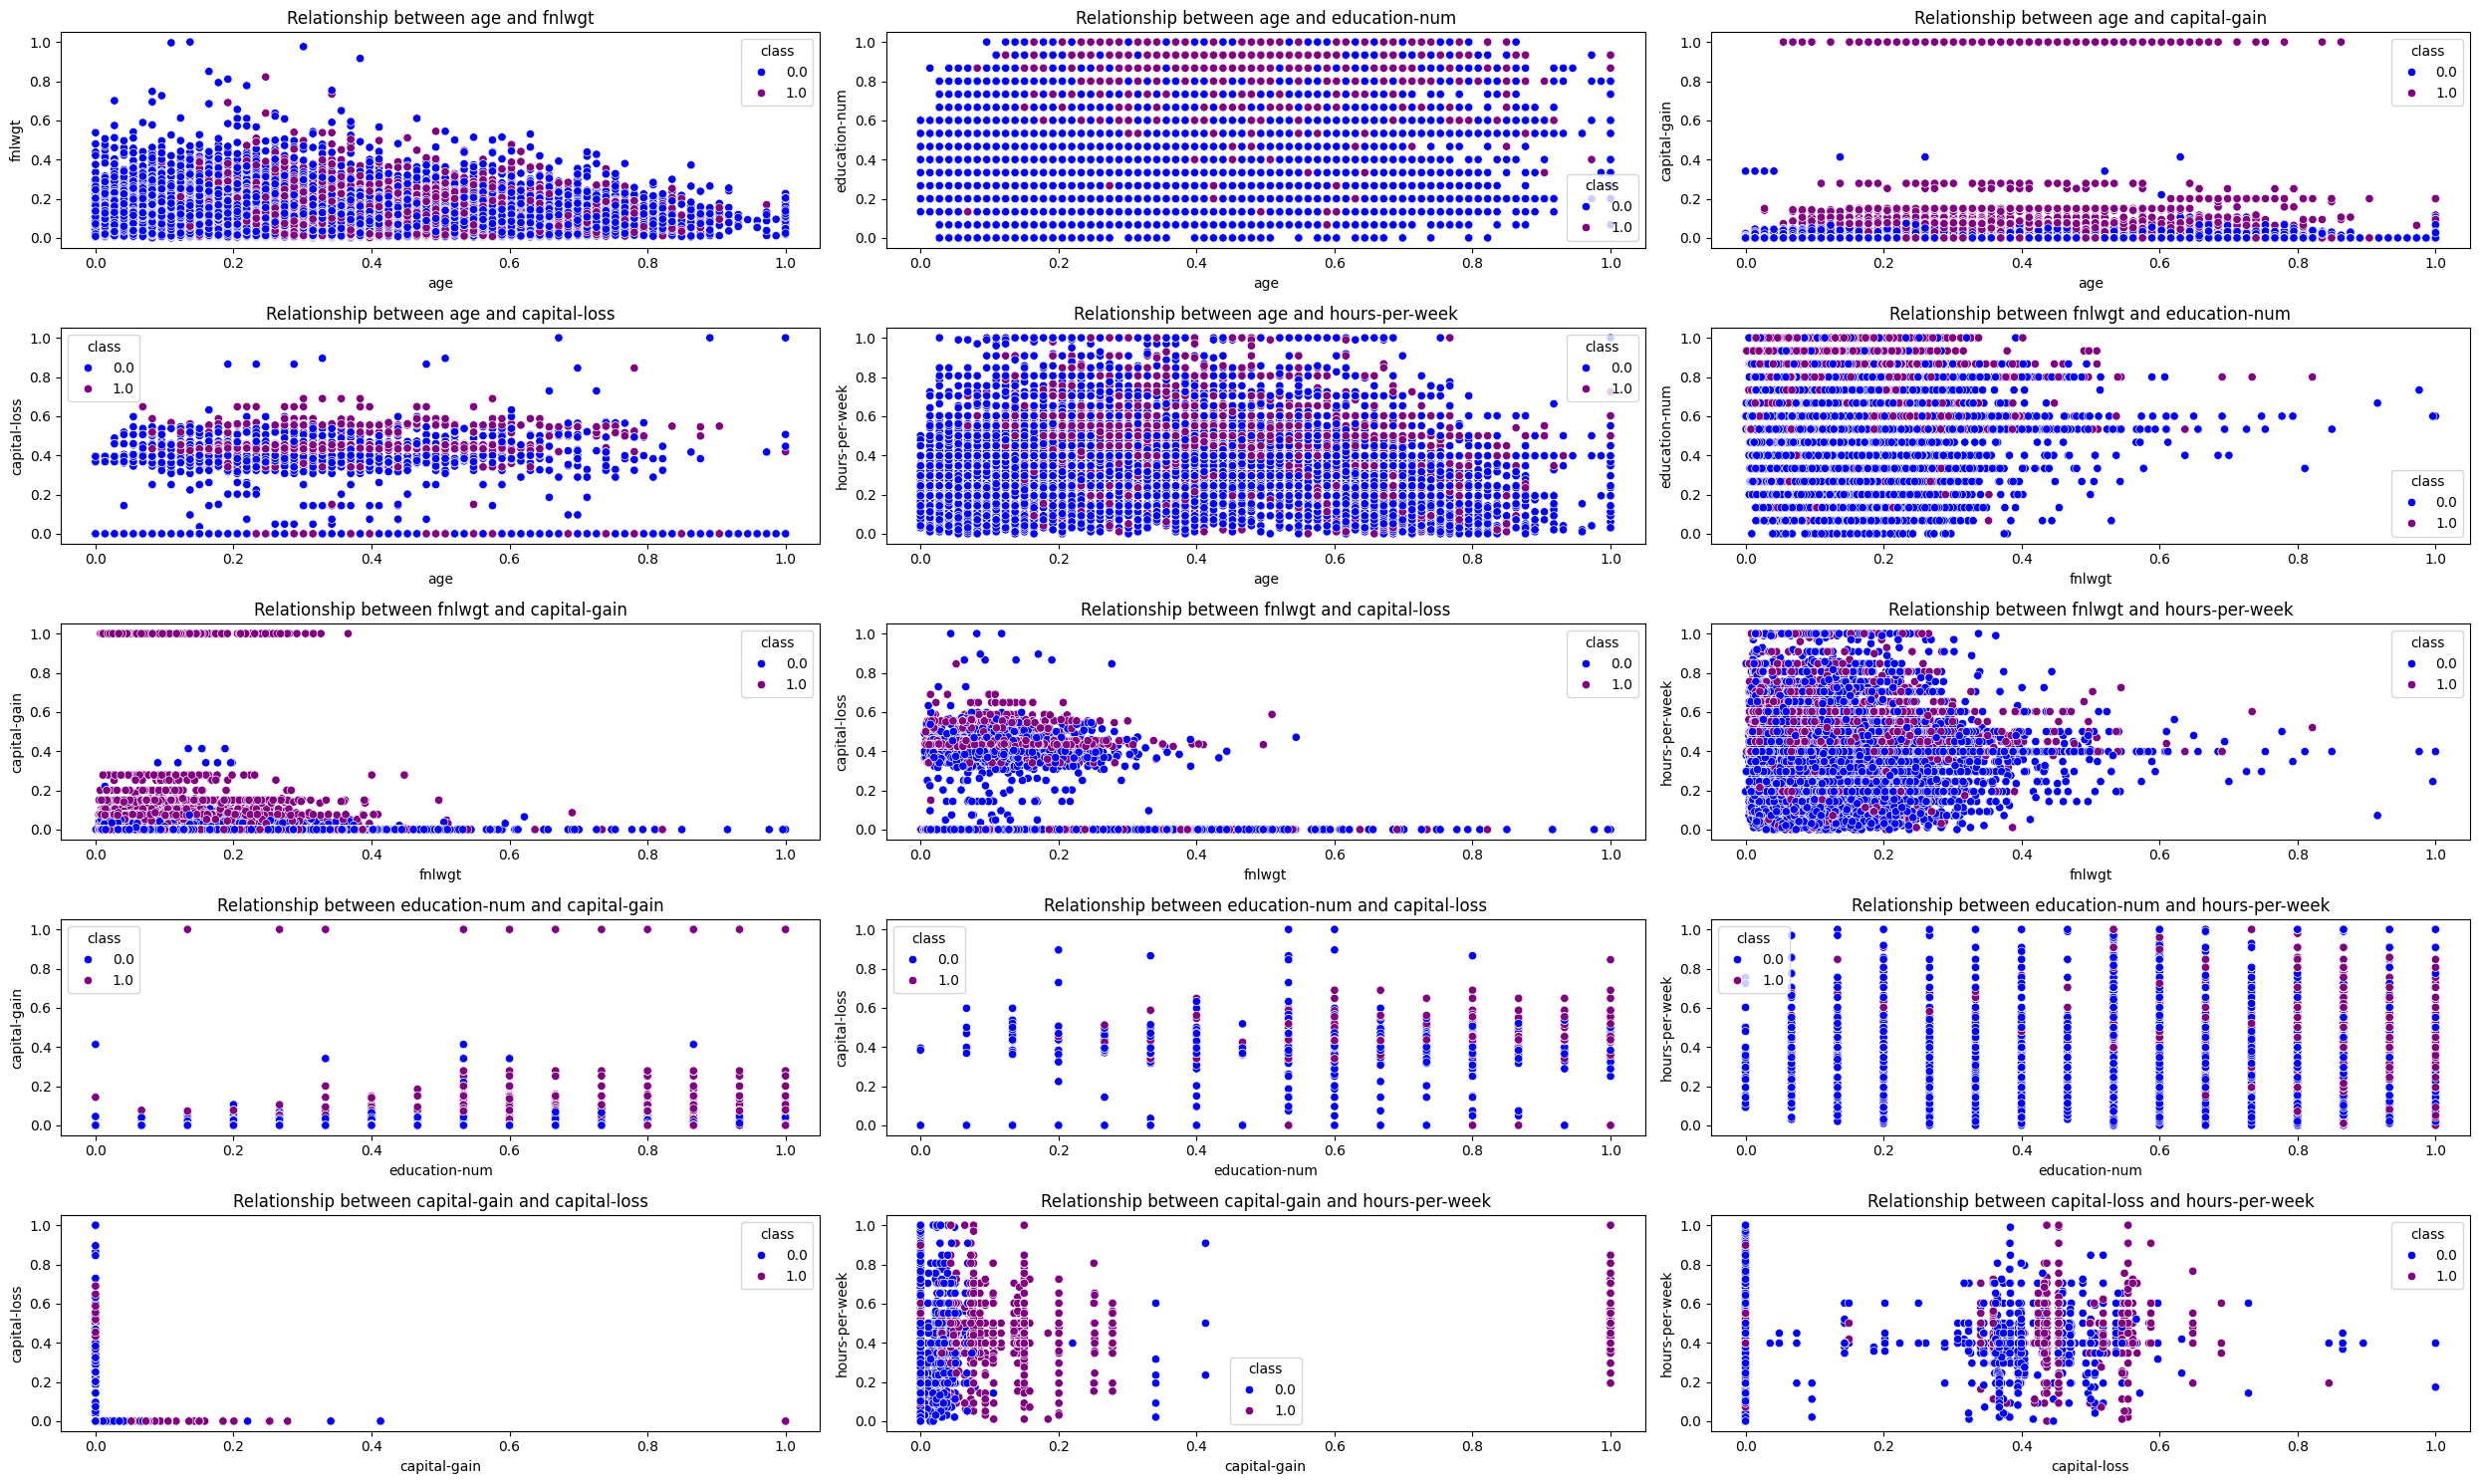

In [ ]:
## VISUALIZATION OF FEATURE RELATIONSHIPS
fig, axes = plt.subplots(5,3,figsize=(25,15))
pairs = list(itertools.combinations(ad_num_features,2))
palette = ['blue', 'purple']
for i in range(0,5):
  for j in range(0,3):
    sns.scatterplot(data=df_adult_pipe, x=pairs[i*3+j][0], y=pairs[i*3+j][1], hue='class', palette=palette, ax=axes[i,j])
    axes[i,j].set_title(f'Relationship between {pairs[i*3+j][0]} and {pairs[i*3+j][1]}')
    axes[i,j].set_xlabel(f'{pairs[i*3+j][0]}')
    axes[i,j].set_ylabel(f'{pairs[i*3+j][1]}')

# FREE MEMORY
plt.tight_layout()
plt.show()
plt.close()